<h1>Project: Concrete compressive strength prediction</h1>

The goal of this project is to predict compressive strength of concrete from composition and age.<br><br>

Supervised machine learning method implementation step are:
<ol>
  <li>EDA</li>
  <li>feature engineering</li>
  <li>feature selection</li>
  <li>regression</li>
  <li>discussion</li>
</ol>

<h2>About the dataset:</h2><br>
Link to the dataset: <a href="https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength">https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength</a>

<b>Abstract</b>

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

<b>Source</b>

Original Owner and Donor
Prof. I-Cheng Yeh
Department of Information Management
Chung-Hua University,
Hsin Chu, Taiwan 30067, R.O.C.
e-mail:icyeh '@' chu.edu.tw
TEL:886-3-5186511

Date Donated: August 3, 2007


<b>Data Set Information</b>

Number of instances 1030
Number of Attributes 9
Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values None


<b>Attribute Information</b>

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable



<b>Relevant Papers</b>

Main
1. I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

Others
2. I-Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998).
3. I-Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks," J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999).
4. I-Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic Engineering, Vol. 15, No. 4, pp. 659-663 (2003).
5. I-Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No. 1, pp. 77-84 (2003).
6. Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and neural networks," Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4, pp.597-604 (2006).



<b>Citation Request</b>

NOTE: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

<b>Results</b><br>
Strength was predicted using XGBoost with RMSE_train of 9 and RMSE_test of 24. R2_train 0.96 and R2_test 0.92. Variables 'Fly_Ash' and 'Superplasticizer' were excluded from the modelling because of their low impact.

<h2>1. EDA</h2>

In [1]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing libraries
from platform import python_version
import warnings

# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy
import scipy.stats as stats # for Q-Q plots

# for plotting
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
import scipy
import scipy.stats as stats # for Q-Q plots

# for validation and evelueation
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# for classification
import xgboost
from xgboost import XGBRegressor

In [3]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)
print('Sklearn version:',sklearn.__version__)
print('XGBoost version:',xgboost.__version__)

Python version: 3.7.14
NumPy version: 1.21.6
Pandas version: 1.3.5
SciPy version: 1.7.3
Sklearn version: 1.0.2
XGBoost version: 0.90


In [4]:
# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [5]:
# importing the dataset
df = pd.read_excel('Concrete_Data.xls')
print(f"{df.shape[1]} columns, {df.shape[0]} rows")
# checking duplicated rows
print(f"{df.duplicated().sum()} duplicated rows")
print('Deleting duplicated rows...')
df.drop_duplicates(inplace=True)
print(f"{df.duplicated().sum()} duplicated rows")
df.head()

9 columns, 1030 rows
25 duplicated rows
Deleting duplicated rows...
0 duplicated rows


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
# reneming columns
new_cols = [
    'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
    'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength']
cols_dict = dict(zip(df.columns, new_cols))
df.rename(cols_dict, axis=1, inplace=True)
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
# showing data types
df.dtypes

Cement                float64
Blast_Furnace_Slag    float64
Fly_Ash               float64
Water                 float64
Superplasticizer      float64
Coarse_Aggregate      float64
Fine_Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [8]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by percent of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [9]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

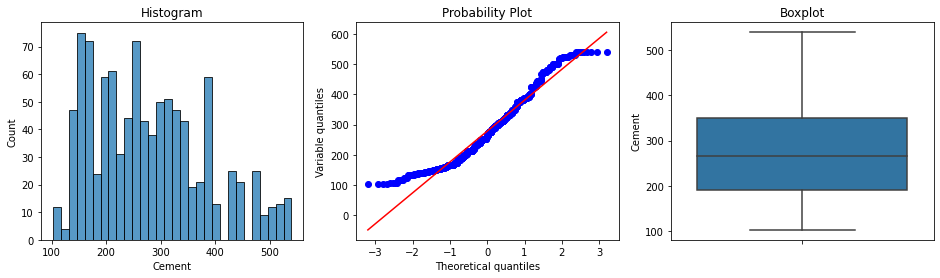

Skewnessis of Cement is 0.56


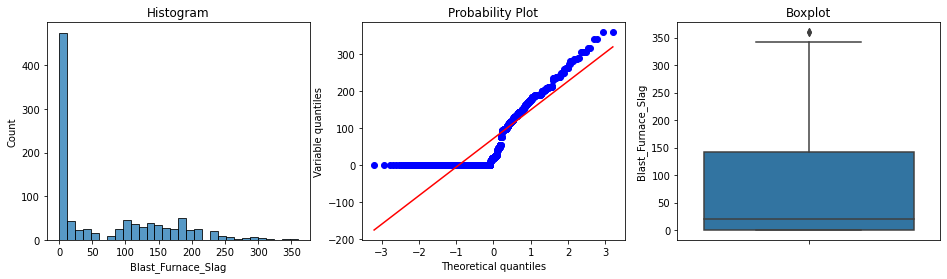

Skewnessis of Blast_Furnace_Slag is 0.86


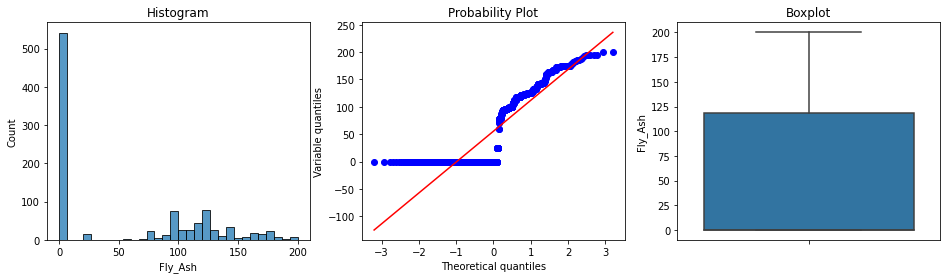

Skewnessis of Fly_Ash is 0.50


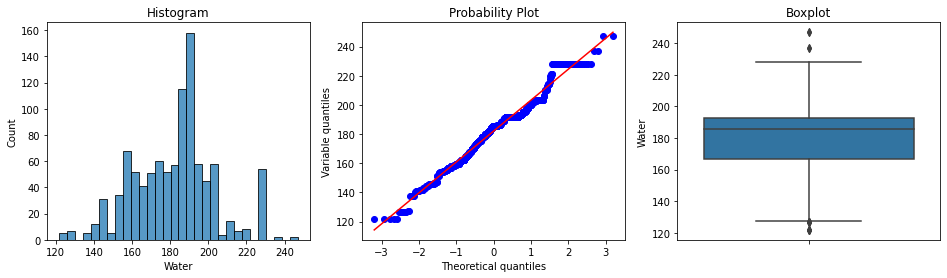

Skewnessis of Water is 0.03


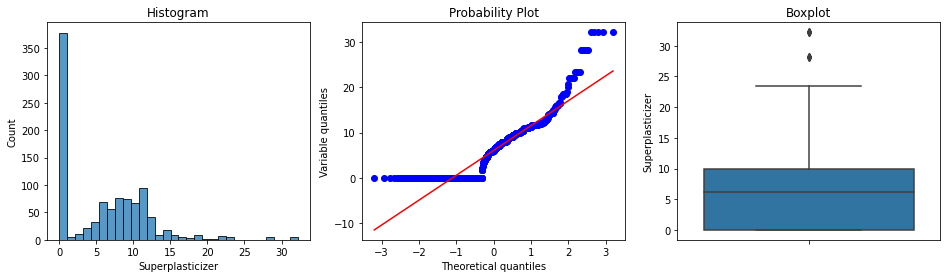

Skewnessis of Superplasticizer is 0.98


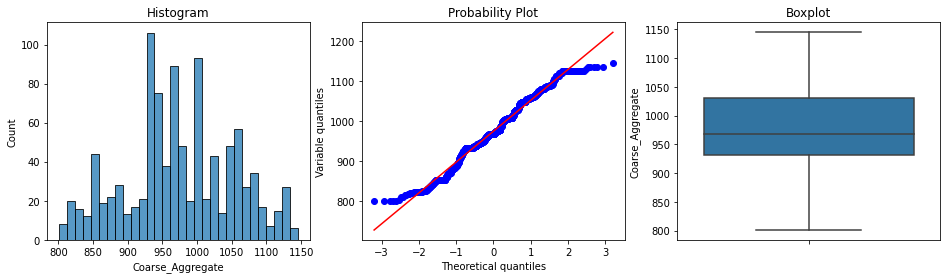

Skewnessis of Coarse_Aggregate is -0.07


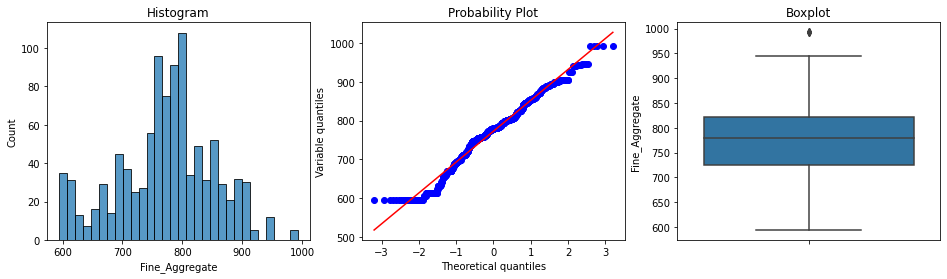

Skewnessis of Fine_Aggregate is -0.25


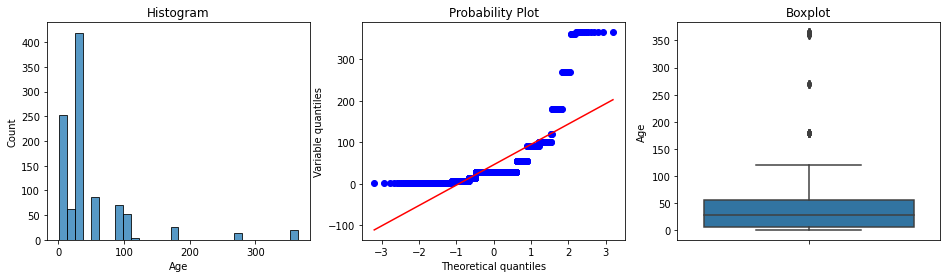

Skewnessis of Age is 3.25


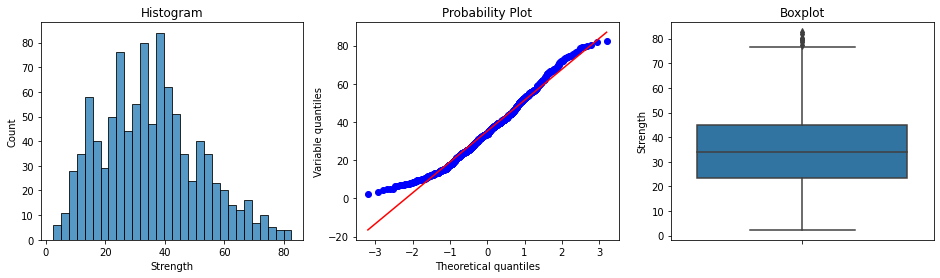

Skewnessis of Strength is 0.40


In [10]:
# plotting numerical variables
for variable in df.columns:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("Skewnessis of", variable, "is {:.2f}".format(skewness))

Discussion: no prominent outliers were detected.

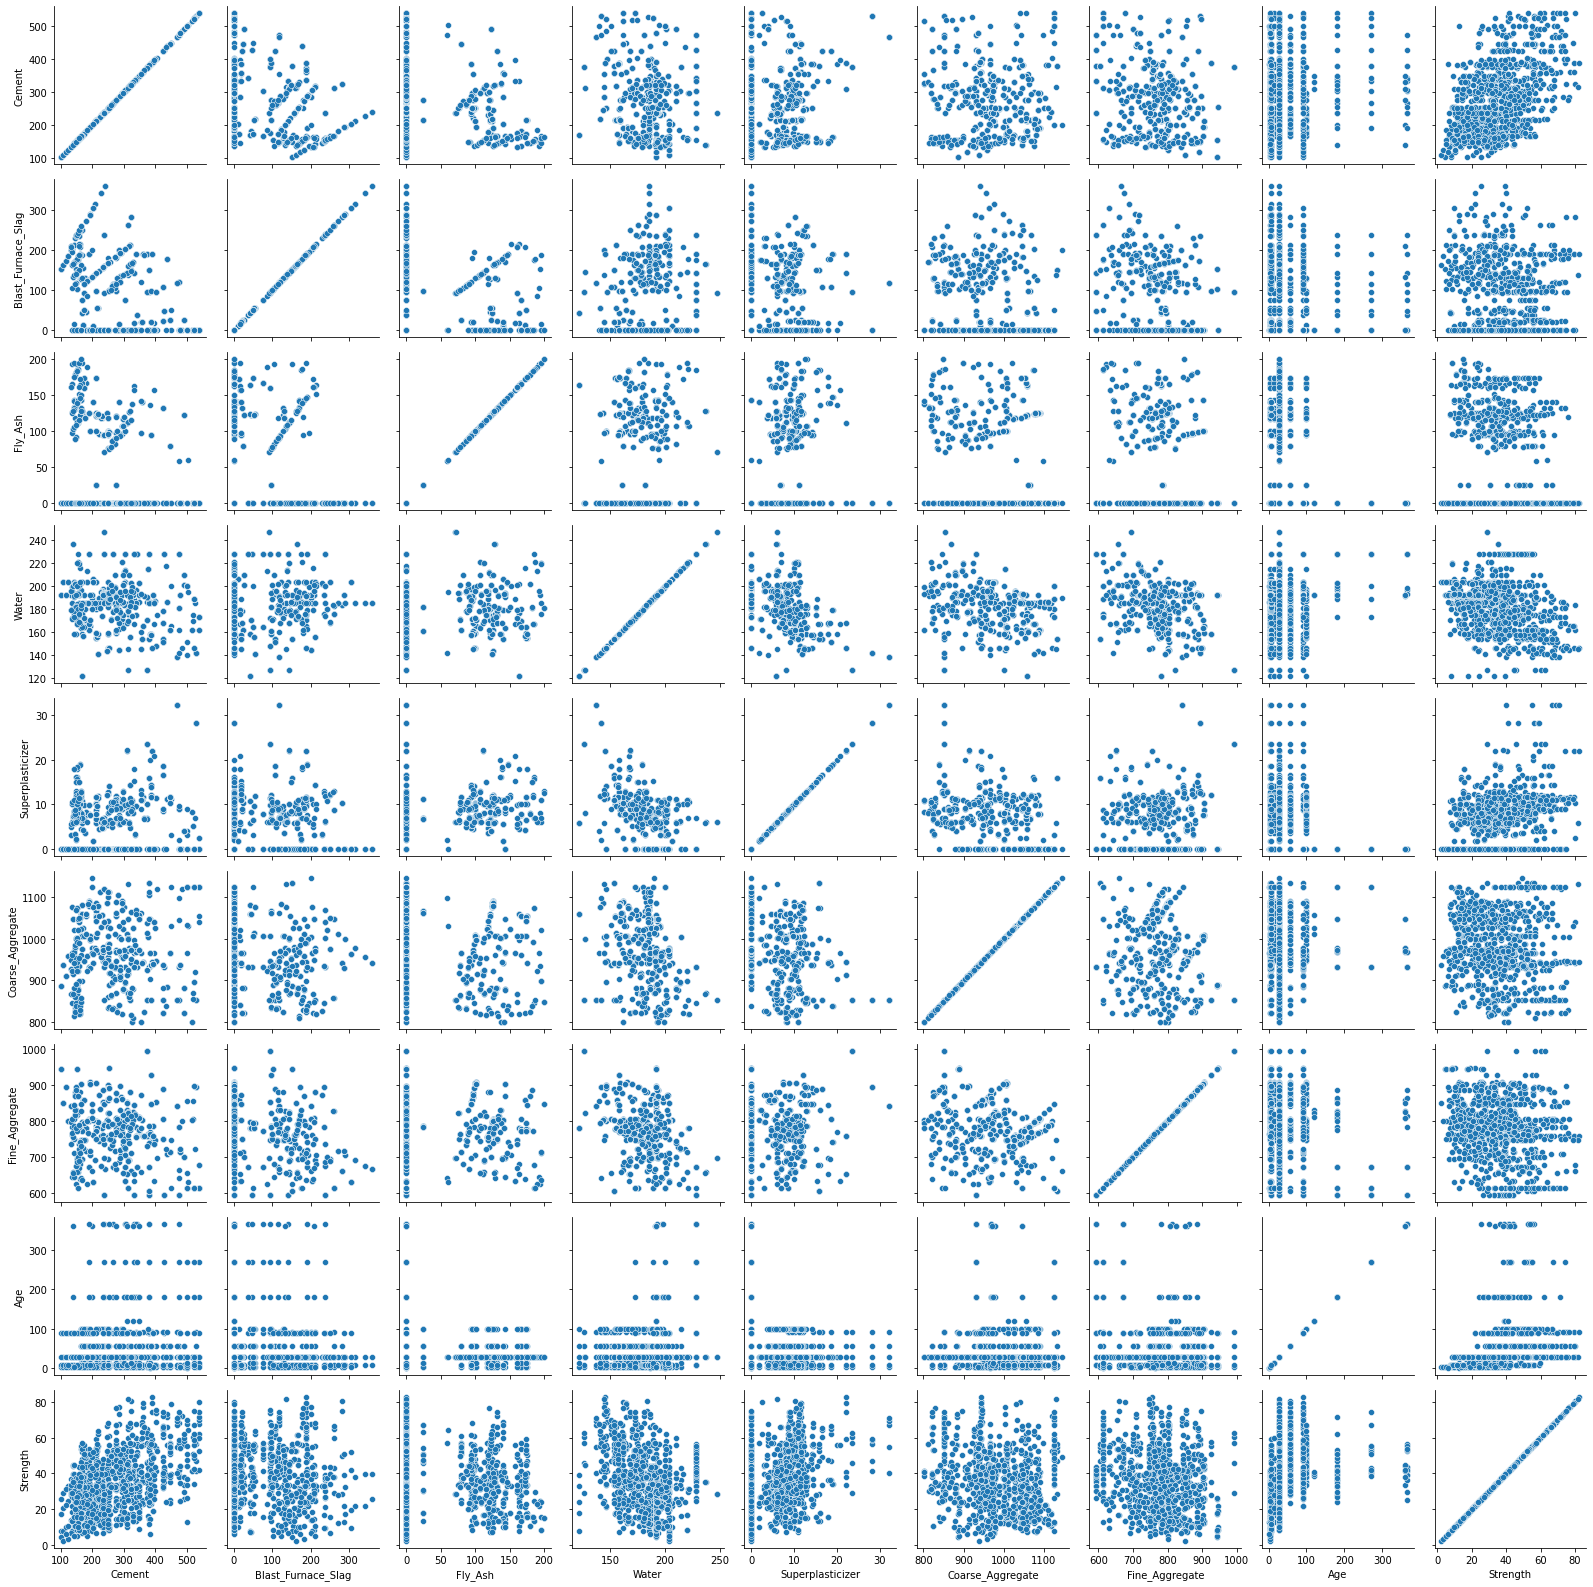

In [11]:
# plotting scatterplots with pairs of the variables
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [12]:
# defining numerical variables and the target
num_vars = df.columns.tolist()[:-1]
print(num_vars)
target = df.columns.tolist()[-1]
print(target)

['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age']
Strength


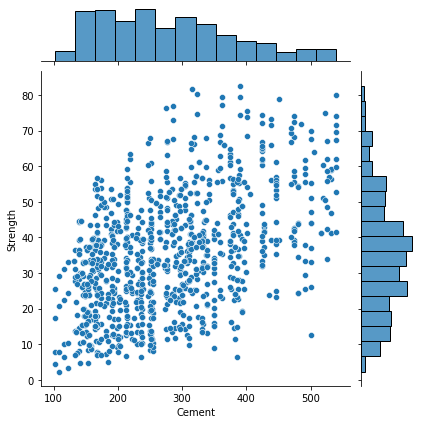

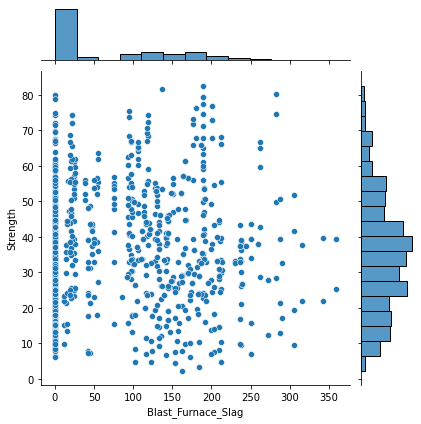

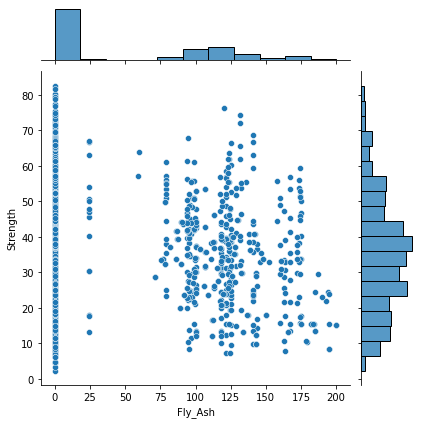

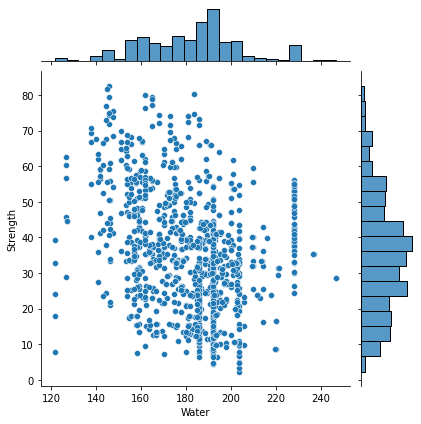

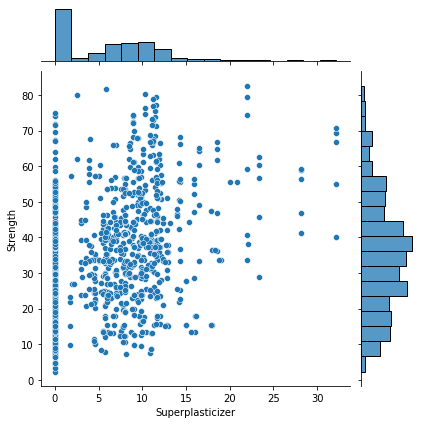

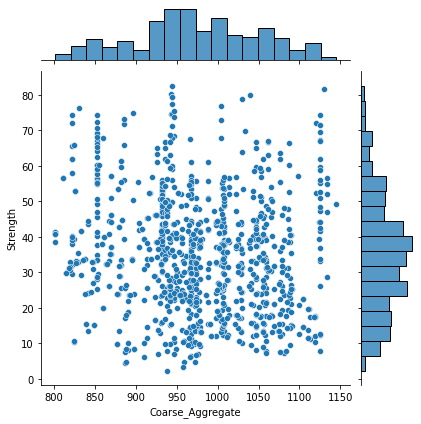

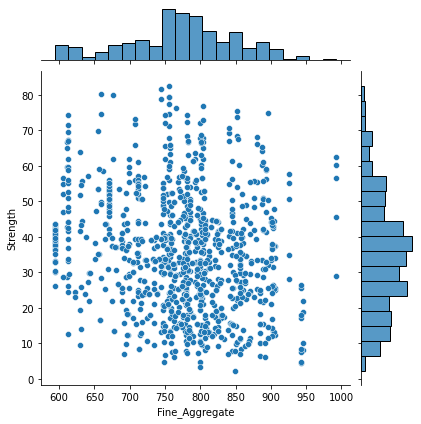

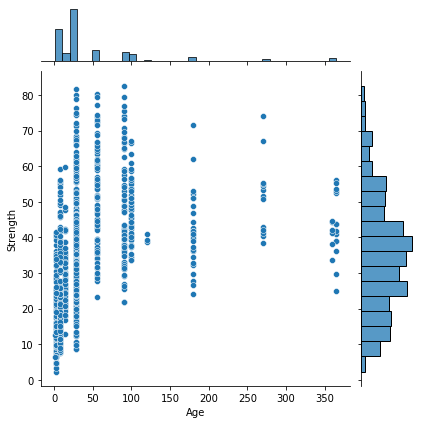

In [13]:
# closer look at influence of numerical variables on the targers
for var in num_vars:
        sns.jointplot(data=df, x=var, y=target)

Discussion: 'Age' , 'Cement' and 'Superplasticizer' prominently influence the target. Numerical variables are not inter-correlated by visual check.

<h2>2. Feature Engineering</h2><br>

All the variables stay as is.

<h2>3. Feature Selection</h2><br>

Feature shuffling

In [14]:
# modelling with one variable shaffled per iteration
for var in num_vars:
    df_shaffled = df.copy()
    df_shaffled[var] =  df_shaffled[var].sample(frac=1).values
    # defining X and y
    X = df_shaffled[num_vars].values
    y = df_shaffled[target].values
    # splitting the dataset to a train and a test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state = 42)
    # defining a regressor
    regressor_xg = XGBRegressor(max_depth=4, max_leaves=200, random_state = 42)
    # fitting the regressor and predicting y_test
    regressor_xg.fit(X_train, y_train)
    y_pred = regressor_xg.predict(X_test)
    # evaluation
    y_train_hat = regressor_xg.predict(X_train)
    print()
    print(f"Shuffled {var}")
    print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
    print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
    print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
    print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[06:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled Cement
RMSE train: 10.71
RMSE test : 27.72
r2 train  : 0.96
r2 test   : 0.90
[06:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled Blast_Furnace_Slag
RMSE train: 9.63
RMSE test : 31.15
r2 train  : 0.96
r2 test   : 0.89
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled Fly_Ash
RMSE train: 9.00
RMSE test : 24.37
r2 train  : 0.96
r2 test   : 0.92
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled Water
RMSE train: 9.38
RMSE test : 31.20
r2 train  : 0.96
r2 test   : 0.89
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffle

Removing 'Fly_Ash' and 'Superplasticizer'.

In [15]:
# defining X and y
model_vars = ['Cement', 'Blast_Furnace_Slag', 'Water', 'Coarse_Aggregate',
              'Fine_Aggregate', 'Age']

<h2>4. Regression</h2>

<b>Using all the numerical variables</b>

In [16]:
# defining X and y
X = df[num_vars].values
y = df[target].values

In [17]:
# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

# defining a regressor
regressor_xg = XGBRegressor(max_depth=4, max_leaves=200, random_state = 42)

# applying k-fold cross validation
rmse = cross_val_score(estimator = regressor_xg,
                       X = X_train, y = y_train, cv = 10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Discussion: with all the variables strength was predicted with RMSE_train of 9 and RMSE_test of 24. R2_train 0.96 and R2_test 0.92.

<b>Using the selected variables</b>

In [18]:
# defining X and y
X = df[model_vars].values
y = df[target].values

In [19]:
# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

# defining a regressor
regressor_xg = XGBRegressor(max_depth=4, max_leaves=200, random_state = 42)

# applying k-fold cross validation
rmse = cross_val_score(estimator = regressor_xg,
                       X = X_train, y = y_train, cv = 10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Discussion: with the selected strength was predicted with RMSE_train of 9 and RMSE_test of 24. R2_train 0.96 and R2_test 0.92.